# Vizualiations and descriptive statistics

Overview:  
 - Plotting of area over time: Geomap with iterations over different year points
 - Timeseries of sector over time

In [2]:
import pandas as pd
import time, requests, re
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
sns.set(rc={'figure.figsize':(11.7,8.27)})
# sns.set_style("whitegrid", {'axes.grid' : True})

In [4]:
# Plotting timeseries of sector over year
data = 
data['country'] = data['station'].apply(extract_letters)

# This simply plots the same figure as above 
# but this time split by country. 
data.groupby(['country', 'datetime_dt'])\
    .agg('mean')\ 
    .reset_index()\
    .set_index('datetime_dt')\ #Set index to year
    .groupby('country')\ #Groupby: 
    .obs_value\
    .plot(figsize=[11,6])
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

SyntaxError: invalid syntax (<ipython-input-4-cea76441ede7>, line 2)

In [31]:
jobindex.area.unique()

array(['storkoebenhavn', 'nordsjaelland', 'region-sjaelland', 'fyn',
       'region-nordjylland', 'region-midtjylland', 'sydjylland',
       'bornholm', 'skaane', 'groenland', 'danmark'], dtype=object)

In [29]:
path = "C:/Users/Naeim.S/Documents/GitHub/GRP33/EXAM/Dataset/JobIndex2.csv"
cols = list(range(1,9))
jobindex = pd.read_csv(path, usecols=cols)
# df = data
jobindex

,year,area,sektor,jobtype,n_jobtype_area_,n_sektor_area,n_area,n_year
0,2007,storkoebenhavn,it,database,447,14136,129310,380597
1,2007,storkoebenhavn,it,itdrift,2894,14136,129310,380597
2,2007,storkoebenhavn,it,itkurser,3,14136,129310,380597
3,2007,storkoebenhavn,it,internet,719,14136,129310,380597
4,2007,storkoebenhavn,it,systemudvikling,8163,14136,129310,380597
5,2007,storkoebenhavn,it,telekom,349,14136,129310,380597
6,2007,storkoebenhavn,it,virksomhedssystemer,1303,14136,129310,380597
7,2007,storkoebenhavn,ingenioer,byggeteknik,2029,8638,129310,380597
8,2007,storkoebenhavn,ingenioer,elektronik,1188,8638,129310,380597
9,2007,storkoebenhavn,ingenioer,kemi,2567,8638,129310,380597


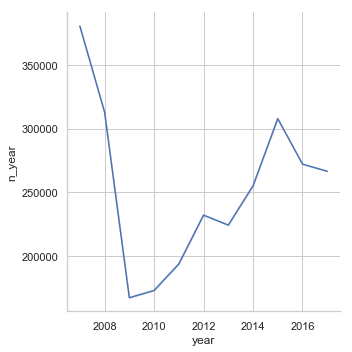

In [3]:
sns.relplot(x="year", y="n_year", kind="line", data=jobindex)

Text(0.5,22.96,'')

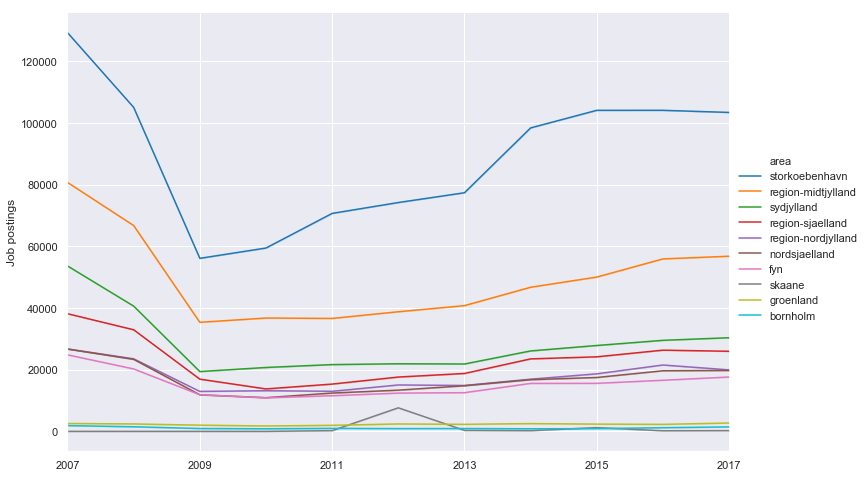

In [8]:
#Exclude "danmark" and sort by n_area and year (for nicer plot):
jobindex_area = jobindex.query(' area != "danmark"').sort_values(by=["n_area","year"], ascending=False)

sns.set_palette("tab10")
sns.relplot(x="year", y="n_area", 
            hue="area", 
            kind="line", 
            height=7, 
            aspect=1.5, 
            legend = "brief",
            data=jobindex_area)
plt.ylabel("Job postings")
plt.yticks(range(0,120001,20000))
plt.xlim(2007,2017)
plt.xticks(range(2007,2018,2))
plt.xlabel("")

Text(0.5,1,'Job postings by sektor in the northern Jutland')

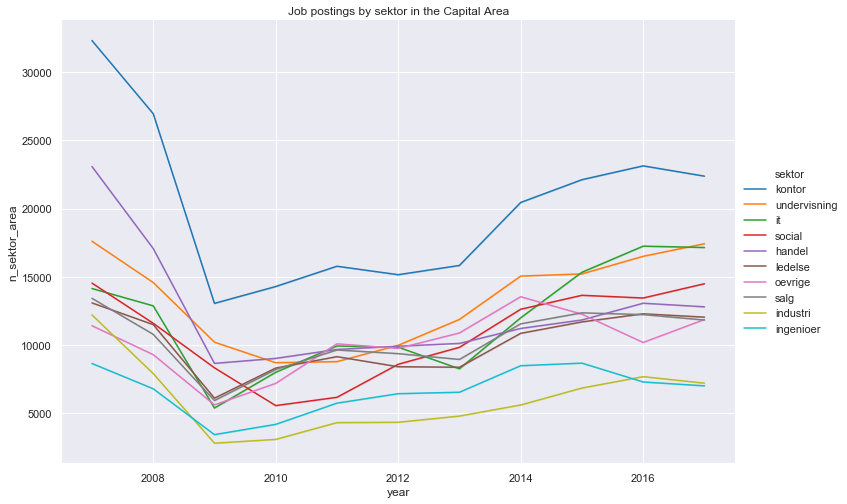

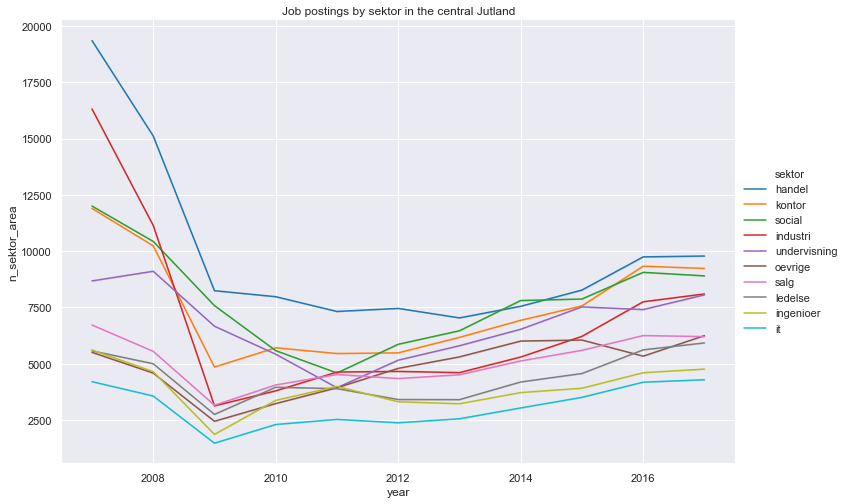

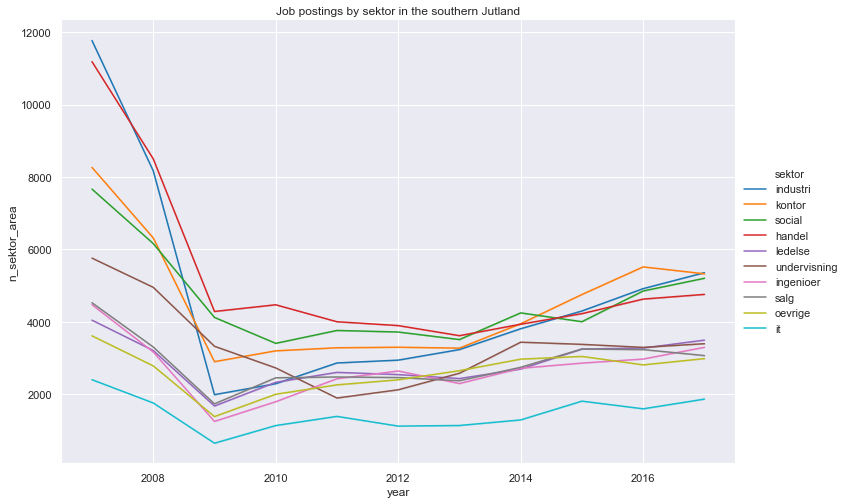

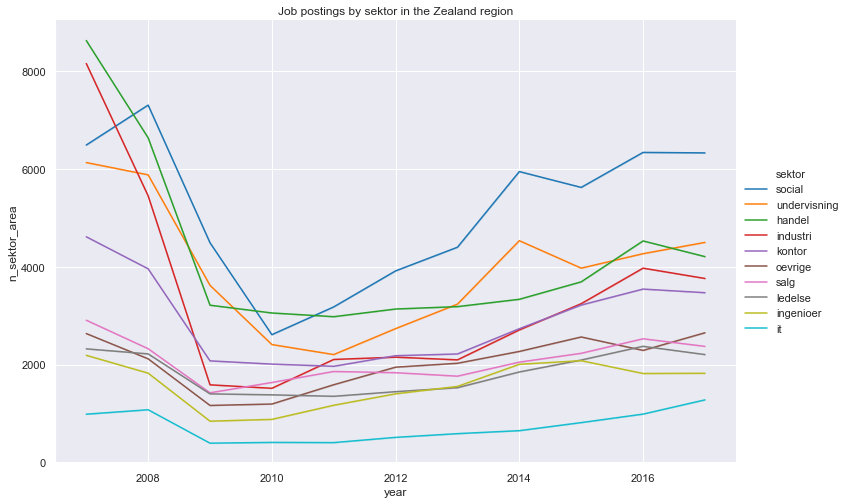

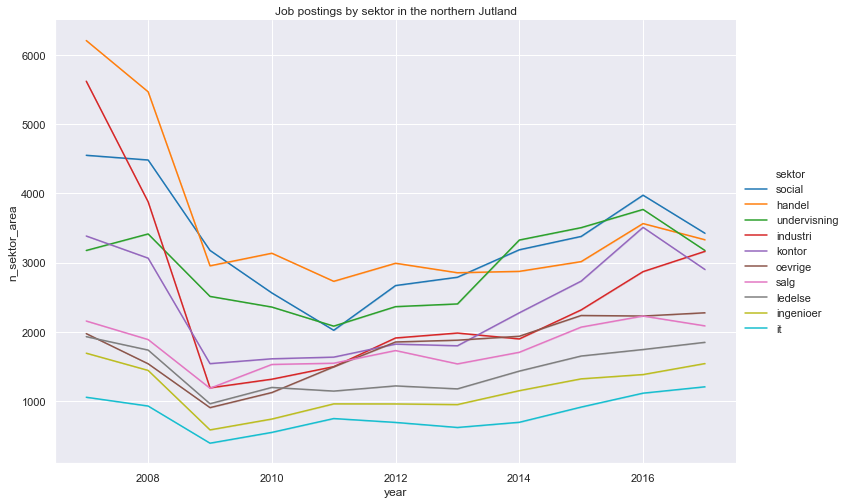

In [24]:
sns.set_palette("tab10")
#KØBENHAVN
sns.relplot(x="year", y="n_sektor_area", 
        hue="sektor", 
        kind="line", 
        legend = "brief",        
        height=7, 
        aspect=1.5, 
        data=jobindex.query('area == "storkoebenhavn" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in the Capital Area")

#MIDTJYLLAND
sns.relplot(x="year", y="n_sektor_area", 
        hue="sektor", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        data=jobindex.query('area == "region-midtjylland" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in the central Jutland")

#SYDJYLLAND
sns.relplot(x="year", y="n_sektor_area", 
        hue="sektor", 
        kind="line",
        height=7, 
        aspect=1.5, 
        legend = "brief",
        data=jobindex.query('area == "sydjylland" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in the southern Jutland")

#REGION SJÆLLAND
sns.relplot(x="year", y="n_sektor_area", 
        hue="sektor", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        data=jobindex.query('area == "region-sjaelland" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in the Zealand region")

#NORDJYLLAND
sns.relplot(x="year", y="n_sektor_area", 
        hue="sektor", 
        kind="line", 
        height=7, 
        aspect=1.5, 
        legend = "brief",
        data=jobindex.query('area == "region-nordjylland" ').sort_values(by=["year", "n_sektor_area"], ascending=False))
plt.title("Job postings by sektor in the northern Jutland")

Text(0.5,1,'Job Postings by area and sector in 2007')

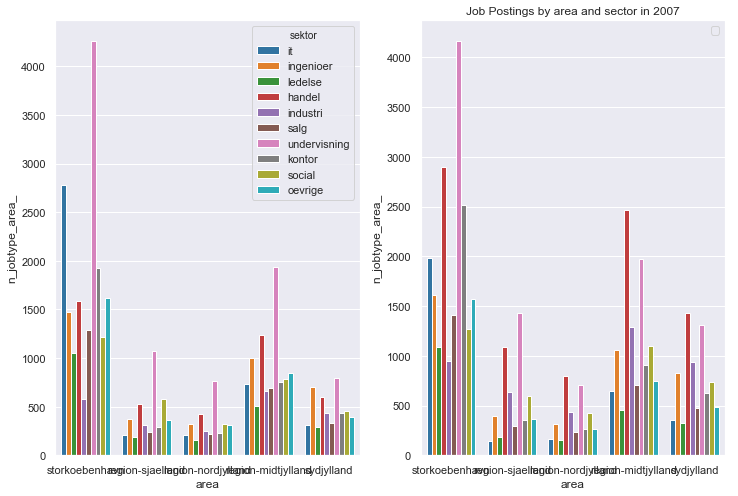

In [26]:
jobindex_topfem = jobindex.query(' area == "storkoebenhavn" | area == "region-midtjylland" | area == "sydjylland" | area == "region-sjaelland" | area == "region-nordjylland"' )

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,8))

sns.barplot(x="area", y="n_jobtype_area_", 
            hue="sektor",
            ci=None,
            
            ax = ax1,
            data=jobindex_topfem.query('year == 2017'))
plt.title("Job Postings by area and sector in 2017")

sns.barplot(x="area", y="n_jobtype_area_", 
            hue="sektor",
            ci=None,
            ax = ax2,
            data=jobindex_topfem.query('year == 2007'))
plt.legend([])
plt.title("Job Postings by area and sector in 2007")